In [76]:
import pylab 
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import glob
import os

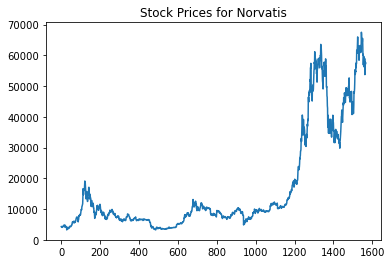

In [57]:
data = pd.read_csv("data/BTC.csv")
bitcoin_price=data['c'].values
#
plt.plot(bitcoin_price)
plt.title('Stock Prices for Norvatis')
plt.show()


In [58]:
def calculateReturn(prices):
    return (prices[1:]-prices[:-1])/prices[:-1]


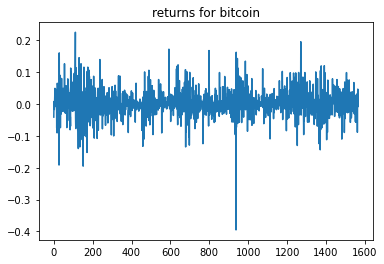

In [59]:
return_btc = calculateReturn(bitcoin_price)
plt.title('returns for bitcoin')
plt.plot(return_btc)
plt.show()

In [60]:
from statsmodels.tsa.stattools import adfuller
adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(return_btc)
print(pvalue)

0.0


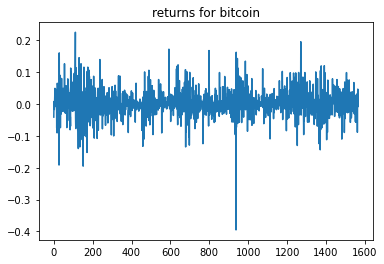

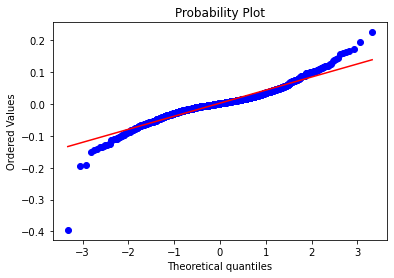

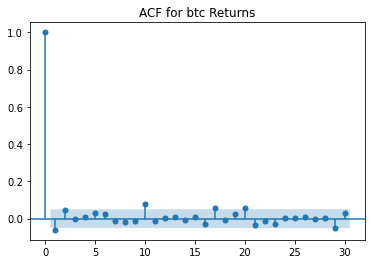

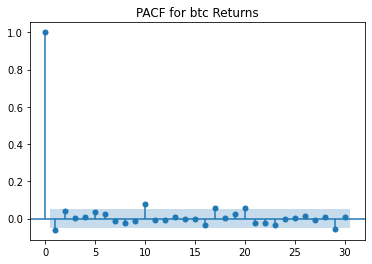

In [61]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


plt.plot(return_btc)
plt.title('returns for bitcoin')
plt.show()
#
import scipy.stats as stats
stats.probplot(return_btc, dist="norm", plot=pylab)
pylab.show()

# Autocorrelation for Novartis returns
acf_plot = plot_acf(return_btc, lags=30, title='ACF for btc Returns')
# partial Autocorrelation for Novartis returns 
pacf_plot = plot_pacf(return_btc, lags=30, title='PACF for btc Returns')

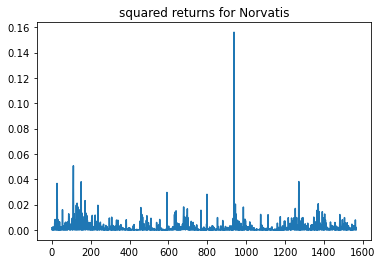

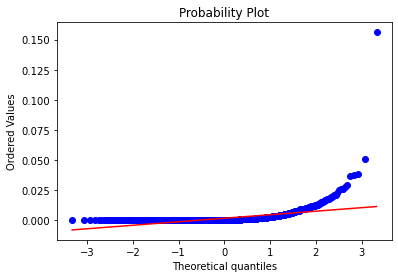

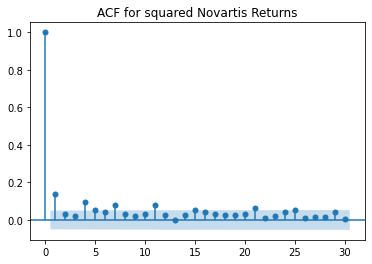

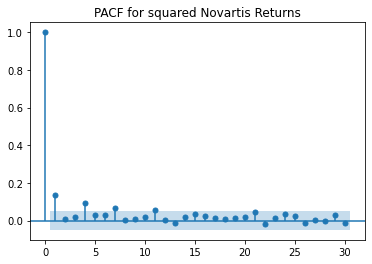

In [62]:
plt.plot(return_btc**2)
plt.title('squared returns for Norvatis')
plt.show()
#
stats.probplot(return_btc**2, dist="norm", plot=pylab)
pylab.show()

# Autocorrelation for Novartis squared returns
acf_plot = plot_acf(return_btc**2, lags=30, title='ACF for squared Novartis Returns')
# partial Autocorrelation for Novartis squared returns 
pacf_plot = plot_pacf(return_btc**2, lags=30, title='PACF for squared Novartis Returns')

In [63]:
# For NOVARTIS
#pip install arch
from arch import arch_model
am = arch_model(return_btc, vol='GARCH', p=1, q=1)
res=am.fit()
print(res.summary())


Iteration:      1,   Func. Count:      6,   Neg. LLF: 942031.4310338856
Iteration:      2,   Func. Count:     17,   Neg. LLF: 385968857865327.1
Iteration:      3,   Func. Count:     28,   Neg. LLF: 317775.13972487
Iteration:      4,   Func. Count:     38,   Neg. LLF: 1458661619990482.8
Iteration:      5,   Func. Count:     49,   Neg. LLF: 401727509658405.4
Iteration:      6,   Func. Count:     60,   Neg. LLF: 712659.3009310344
Iteration:      7,   Func. Count:     71,   Neg. LLF: 4523955898722893.0
Iteration:      8,   Func. Count:     81,   Neg. LLF: -2799.197269268735
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2799.1972657955375
            Iterations: 12
            Function evaluations: 81
            Gradient evaluations: 8
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:

/home/remy/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001801. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning


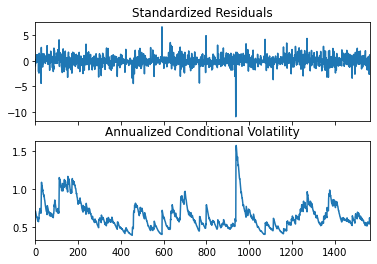

In [64]:
fig = res.plot(annualize="D")
#Annualized Volatility Formula = √252 * √Variance

/home/remy/anaconda3/lib/python3.7/site-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


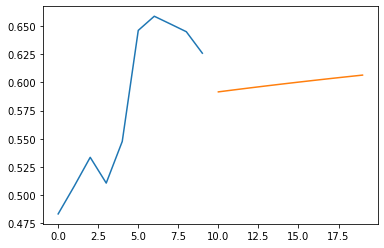

In [73]:

#https://github.com/chibui191/bitcoin_volatility_forecasting
#https://www.wallstreetmojo.com/volatility-formula/
yhat = res.forecast(horizon=10)
# plot forecast variance
#volatility

vol = yhat.variance.values[-1, :]


# calculate the annualized vol
vol_pred = vol**0.5 * np.sqrt(252)

# calculate a rolling volatility annualized
vol_ob = pd.Series(return_btc).rolling(window = 10).std() * np.sqrt(252)
a = np.arange(10)
b = np.arange(10, 20)
plt.plot(a,vol_ob[-10:])
plt.plot(b,vol_pred)
plt.show()

0.6737726338101235
0.5916386165042105
0


In [100]:
def predict_vol(file_name):
    
    data = pd.read_csv(file_name)
    price=data['c'].values
    return_price = calculateReturn(price)
    am = arch_model(return_price, vol='GARCH', p=1, q=1)
    res=am.fit()
    yhat = res.forecast(horizon=1) # we forcast only one vlaue in the futur (one day)
    vol_price = yhat.variance.values[-1, :]
    # calculate the annualized vol
    vol_pred = vol_price**0.5 * np.sqrt(252)
    today_vol = np.std(return_price) * np.sqrt(252)
    tomorrow_vol = vol_pred[0]

    print(today_vol)
    print(tomorrow_vol)
    result = 0
    if today_vol < tomorrow_vol:
        print('vol explode')
        result = today_vol / tomorrow_vol


    return result
    
    

In [101]:
path = r'data/'                     # use your path
all_files = glob.glob(os.path.join(path, "*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent

result = {}
for file in all_files:
    
    resu = predict_vol(file)
    if resu != 0:
        print(resu)
        result[file] = resu

/home/remy/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01815. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning
/home/remy/anaconda3/lib/python3.7/site-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/home/remy/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:310: DataScaleWar

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1302053259.0341618
Iteration:      2,   Func. Count:     14,   Neg. LLF: 13925541.31786177
Iteration:      3,   Func. Count:     21,   Neg. LLF: -15.811983659163857
Iteration:      4,   Func. Count:     26,   Neg. LLF: -15.83170793526827
Iteration:      5,   Func. Count:     31,   Neg. LLF: -14.836795535588168
Iteration:      6,   Func. Count:     37,   Neg. LLF: -15.832618067355748
Iteration:      7,   Func. Count:     42,   Neg. LLF: -15.832637486072123
Iteration:      8,   Func. Count:     46,   Neg. LLF: -15.832637486134232
Optimization terminated successfully    (Exit mode 0)
            Current function value: -15.832637486072123
            Iterations: 8
            Function evaluations: 46
            Gradient evaluations: 8
2.1385539581096404
2.096992119790719
Iteration:      1,   Func. Count:      6,   Neg. LLF: 230136308.4873238
Iteration:      2,   Func. Count:     16,   Neg. LLF: 4802972.056186156
Iteration:      3,   F

/home/remy/anaconda3/lib/python3.7/site-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/home/remy/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.02133. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning
/home/remy/anaconda3/lib/python3.7/site-packages/arch/__future__/_utility.py:21: FutureWar

1.544381684033475
1.4195169961383023
Iteration:      1,   Func. Count:      6,   Neg. LLF: 162847009.83322176
Iteration:      2,   Func. Count:     14,   Neg. LLF: 14489477.590274157
Iteration:      3,   Func. Count:     21,   Neg. LLF: -10.096364392473058
Iteration:      4,   Func. Count:     26,   Neg. LLF: -10.09897298209628
Iteration:      5,   Func. Count:     31,   Neg. LLF: -10.09949705539917
Iteration:      6,   Func. Count:     36,   Neg. LLF: -10.09981534799567
Iteration:      7,   Func. Count:     41,   Neg. LLF: -10.099833500301532
Iteration:      8,   Func. Count:     46,   Neg. LLF: -10.099834161005285
Optimization terminated successfully    (Exit mode 0)
            Current function value: -10.099834161005285
            Iterations: 8
            Function evaluations: 46
            Gradient evaluations: 8
2.318184421262741
2.318211469442982
vol explode
0.9999883323067815
Iteration:      1,   Func. Count:      6,   Neg. LLF: 1494831.327919355
Iteration:      2,   Func. C

/home/remy/anaconda3/lib/python3.7/site-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/home/remy/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.03714. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning
/home/remy/anaconda3/lib/python3.7/site-packages/arch/__future__/_utility.py:21: FutureWar


1.4923186904810086
Iteration:      1,   Func. Count:      6,   Neg. LLF: 139311.60232853732
Iteration:      2,   Func. Count:     16,   Neg. LLF: 1049.8417047876205
Iteration:      3,   Func. Count:     22,   Neg. LLF: -17.26269897611272
Iteration:      4,   Func. Count:     28,   Neg. LLF: -20.38190222285316
Iteration:      5,   Func. Count:     34,   Neg. LLF: -21.101003766215808
Iteration:      6,   Func. Count:     40,   Neg. LLF: 35.29986803093047
Iteration:      7,   Func. Count:     47,   Neg. LLF: -33.543043898240704
Iteration:      8,   Func. Count:     52,   Neg. LLF: -33.44292681614657
Iteration:      9,   Func. Count:     58,   Neg. LLF: -33.61695831304303
Iteration:     10,   Func. Count:     63,   Neg. LLF: -33.623457243745136
Iteration:     11,   Func. Count:     68,   Neg. LLF: -33.62347086754329
Iteration:     12,   Func. Count:     73,   Neg. LLF: -22.23566477827356
Optimization terminated successfully    (Exit mode 0)
            Current function value: -33.62347136

/home/remy/anaconda3/lib/python3.7/site-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/home/remy/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01465. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning
/home/remy/anaconda3/lib/python3.7/site-packages/arch/__future__/_utility.py:21: FutureWar

Iteration:      1,   Func. Count:      6,   Neg. LLF: 930540.868494931
Iteration:      2,   Func. Count:     17,   Neg. LLF: -667.727213822518
Iteration:      3,   Func. Count:     24,   Neg. LLF: -1214.6674033162371
Iteration:      4,   Func. Count:     30,   Neg. LLF: -1114.2154672340575
Iteration:      5,   Func. Count:     36,   Neg. LLF: -1152.4119766192339
Iteration:      6,   Func. Count:     43,   Neg. LLF: -1168.6918046527987
Iteration:      7,   Func. Count:     50,   Neg. LLF: 15122497.632741306
Iteration:      8,   Func. Count:     60,   Neg. LLF: -1218.9595613501497
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1218.9595628585837
            Iterations: 12
            Function evaluations: 60
            Gradient evaluations: 8
1.1160520490243118
0.9080064173188526
Iteration:      1,   Func. Count:      6,   Neg. LLF: 7633193.272974412
Iteration:      2,   Func. Count:     17,   Neg. LLF: -1348.9817894534656
Iteration:      3,  

/home/remy/anaconda3/lib/python3.7/site-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/home/remy/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.00955. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning
/home/remy/anaconda3/lib/python3.7/site-packages/arch/__future__/_utility.py:21: FutureWar

Iteration:      1,   Func. Count:      6,   Neg. LLF: 28685257.667866483
Iteration:      2,   Func. Count:     17,   Neg. LLF: -548.7630028187806
Iteration:      3,   Func. Count:     26,   Neg. LLF: 764.775353957215
Iteration:      4,   Func. Count:     34,   Neg. LLF: -1712.0361154597058
Iteration:      5,   Func. Count:     40,   Neg. LLF: -1731.293471194348
Iteration:      6,   Func. Count:     47,   Neg. LLF: -1760.601003994881
Iteration:      7,   Func. Count:     53,   Neg. LLF: -1884.0889176462083
Iteration:      8,   Func. Count:     59,   Neg. LLF: -1885.2326307867522
Iteration:      9,   Func. Count:     64,   Neg. LLF: -1885.2783601194596
Iteration:     10,   Func. Count:     69,   Neg. LLF: -1885.2786602733515
Iteration:     11,   Func. Count:     74,   Neg. LLF: -1885.27868512557
Iteration:     12,   Func. Count:     78,   Neg. LLF: -1885.2786851256783
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1885.27868512557
            I

/home/remy/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.008356. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning
/home/remy/anaconda3/lib/python3.7/site-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/home/remy/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:310: DataScaleWa

Iteration:      1,   Func. Count:      6,   Neg. LLF: 15320.165133568558
Iteration:      2,   Func. Count:     16,   Neg. LLF: 6135.235183451829
Iteration:      3,   Func. Count:     23,   Neg. LLF: -450.84733197903006
Iteration:      4,   Func. Count:     29,   Neg. LLF: -438.62134080057854
Iteration:      5,   Func. Count:     35,   Neg. LLF: 91827.47324110464
Iteration:      6,   Func. Count:     42,   Neg. LLF: -451.7203552558517
Iteration:      7,   Func. Count:     48,   Neg. LLF: -97.39930736372288
Iteration:      8,   Func. Count:     55,   Neg. LLF: -455.1829178614547
Iteration:      9,   Func. Count:     61,   Neg. LLF: -452.8360020521511
Iteration:     10,   Func. Count:     67,   Neg. LLF: -456.3162118254371
Iteration:     11,   Func. Count:     73,   Neg. LLF: -456.344426542852
Iteration:     12,   Func. Count:     78,   Neg. LLF: -456.34444025537726
Iteration:     13,   Func. Count:     82,   Neg. LLF: -456.3444402558953
Optimization terminated successfully    (Exit mode 

/home/remy/anaconda3/lib/python3.7/site-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/home/remy/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.009311. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning
/home/remy/anaconda3/lib/python3.7/site-packages/arch/__future__/_utility.py:21: FutureWa

1.3831089939830477
1.0327130657197805
Iteration:      1,   Func. Count:      6,   Neg. LLF: 11362011.502560126
Iteration:      2,   Func. Count:     18,   Neg. LLF: -830.7159703544653
Iteration:      3,   Func. Count:     24,   Neg. LLF: 539591390.6000572
Iteration:      4,   Func. Count:     32,   Neg. LLF: -982.2912698450584
Iteration:      5,   Func. Count:     38,   Neg. LLF: -1019.0318949310335
Iteration:      6,   Func. Count:     44,   Neg. LLF: -775.9841869204629
Iteration:      7,   Func. Count:     50,   Neg. LLF: -777.5070293173346
Iteration:      8,   Func. Count:     57,   Neg. LLF: -1016.2136468466897
Iteration:      9,   Func. Count:     63,   Neg. LLF: -1020.2537243672191
Iteration:     10,   Func. Count:     68,   Neg. LLF: -1020.2549714359534
Iteration:     11,   Func. Count:     73,   Neg. LLF: -1020.2549738280045
Iteration:     12,   Func. Count:     77,   Neg. LLF: -1020.2549738281457
Optimization terminated successfully    (Exit mode 0)
            Current functio

/home/remy/anaconda3/lib/python3.7/site-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/home/remy/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.006017. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning
/home/remy/anaconda3/lib/python3.7/site-packages/arch/__future__/_utility.py:21: FutureWa

Iteration:      3,   Func. Count:     26,   Neg. LLF: -964.3111094470275
Iteration:      4,   Func. Count:     33,   Neg. LLF: -1213.8265357141772
Iteration:      5,   Func. Count:     39,   Neg. LLF: -1220.6862274412565
Iteration:      6,   Func. Count:     45,   Neg. LLF: -1218.9918079660545
Iteration:      7,   Func. Count:     51,   Neg. LLF: -1221.0097058969175
Iteration:      8,   Func. Count:     56,   Neg. LLF: -1221.010084608014
Iteration:      9,   Func. Count:     61,   Neg. LLF: -1221.0101707921874
Iteration:     10,   Func. Count:     66,   Neg. LLF: -1221.0101718549276
Iteration:     11,   Func. Count:     72,   Neg. LLF: -1221.0101725478467
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1221.0101731864388
            Iterations: 11
            Function evaluations: 75
            Gradient evaluations: 11
1.1209910596842287
1.0142350654497299
Iteration:      1,   Func. Count:      6,   Neg. LLF: 1501960.4933377316
Iteration:    

/home/remy/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.003375. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning
/home/remy/anaconda3/lib/python3.7/site-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/home/remy/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:310: DataScaleWa

In [102]:
result

{'data/XTZ.csv': 0.8732406297796845,
 'data/ENS.csv': 0.9999883323067815,
 'data/MBOX.csv': 0.6233039397772566,
 'data/ENJ.csv': 0.959809136010654,
 'data/ZEC.csv': 0.7233513677235993,
 'data/STX.csv': 0.9917582285628952,
 'data/ANKR.csv': 0.8308084525803803,
 'data/RSR.csv': 0.8844683923432791,
 'data/BAT.csv': 0.5112034362600554,
 'data/OCEAN.csv': 0.9408356674271298,
 'data/ROSE.csv': 0.9449928584236046}